In [36]:
import pandas as pd
from tslearn.clustering import TimeSeriesKMeans
from tslearn.utils import to_time_series_dataset
from tslearn.generators import random_walks
import numpy as np

date = pd.date_range('2019-01-01','2021-08-23', freq = 'd')

x_data = random_walks(n_ts = 12, sz = 365, d = 1, random_state = 1234)
x_data2 = random_walks(n_ts = 12, sz = len(date)-365, d = 1, random_state = 1234)

In [37]:
print('x_data shape :',x_data.shape)
print('x_data2 shape :',x_data2.shape)

x_data shape : (12, 365, 1)
x_data2 shape : (12, 601, 1)


- [tslearn.generators.random_walks docs](https://tslearn.readthedocs.io/en/stable/gen_modules/generators/tslearn.generators.random_walks.html)에 따르면 
  <br> n_ts : Number of time series.</br> 
  <br> sz : Length of time series (number of time instants).</br> 
  <br> d : Dimensionality of time series.</br><br></br>
<br></br>
- x_data의 경우 12개의 time series데이터, 365의 길이를 가지고 1개의 차원을 가진 데이터이다. 즉, 12x365x1의 데이터이다.
- x_data2의 경우 12개의 time series데이터, 601의 길이를 가지고 1개의 차원을 가진 데이터이다. 즉, 12x601x1의 데이터이다.

In [38]:
data = np.concatenate((x_data, x_data2), axis = 1)
data.shape

(12, 966, 1)

- 데이터를 하나로 합치고 12x966x1 차원의 데이터로 만들었다.

In [60]:
df = pd.DataFrame(data.reshape(-1,966)).T
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 966 entries, 0 to 965
Data columns (total 12 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       966 non-null    float64
 1   1       966 non-null    float64
 2   2       966 non-null    float64
 3   3       966 non-null    float64
 4   4       966 non-null    float64
 5   5       966 non-null    float64
 6   6       966 non-null    float64
 7   7       966 non-null    float64
 8   8       966 non-null    float64
 9   9       966 non-null    float64
 10  10      966 non-null    float64
 11  11      966 non-null    float64
dtypes: float64(12)
memory usage: 90.7 KB


- 12개의 time series 데이터가 어떻게 생겼는지 파악 하기 위해 시각화를 해봐야겠다.
- 3차원 -> 2차원으로 변환시키고 dataframe으로 만들었다.

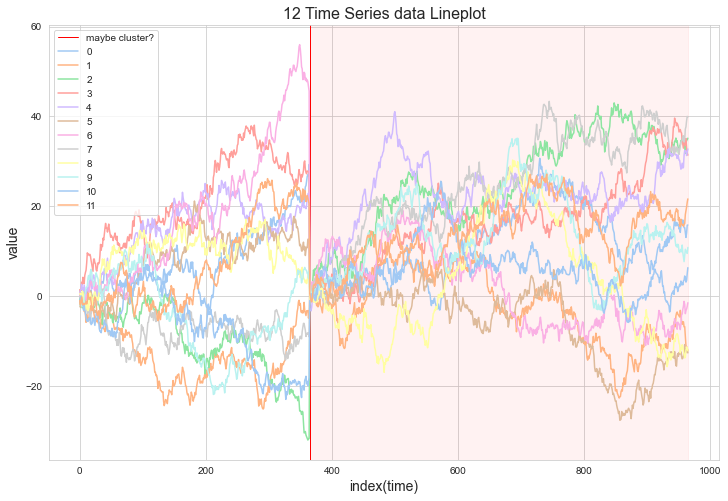

In [89]:
f, ax = plt.subplots(figsize = (12,8))
plt.axvline(365, color = 'red',label = 'maybe cluster?', linewidth = 1)
plt.axvspan(365, 966, color = 'red', alpha = 0.05)  

for i in range(12):
    df[i].plot()

plt.xlabel('index(time)', fontsize = 14)
plt.ylabel('value', fontsize = 14)
plt.legend()
plt.title('12 Time Series data Lineplot', fontsize = 16)
plt.show()

- 12개의 time series 데이터를 시각화해보았다.
- x_data와 x_data2를 365개 기준으로 전후로 나눴기 때문에 같은 label도 index 365번 이후로 차이가 많이 나는것이 확인 되었다.
<br></br><br></br>
- time series clustering을 하는것이 목표이므로 그냥 눈으로 봤을때는 어떻게 clustering을 진행해야하는지 한번에 보이지 않는다.
- tslearn의 TimeSeriesKMeans를 사용하기로 결정

In [39]:
k_means = TimeSeriesKMeans(n_clusters = 4, metric= 'dtw', max_iter = 5, random_state = 1234)
t_data = k_means.fit_predict(data)

- 손이 가는대로 4개의 클러스터로 나누고 metric은 'dtw'로 해보자
- 추후에 클러스터갯수는 최적으로 조정할 예정

In [40]:
k_means.cluster_centers_.shape

(4, 966, 1)

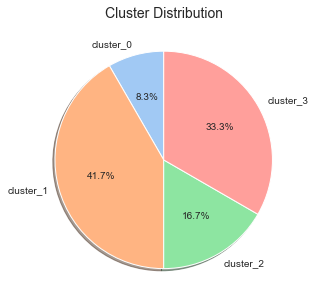

In [41]:
import collections
import matplotlib.pyplot as plt
import seaborn as sns

sns.set_palette("pastel")
sns.set_style('whitegrid')

labels = []
sizes = []

for i in range(4):
    labels.append('cluster_'+str(i))
    sizes.append(collections.Counter(t_data)[i])

f, ax = plt.subplots(figsize = (10,5))
plt.pie(sizes,
        labels = labels,
        shadow = True,
        startangle = 90,
        autopct = '%1.1f%%')

plt.title('Cluster Distribution', fontsize = 14)
plt.show()

- random walk로 생성한 12개의 time series 데이터를 4개의 cluster로 나눈 결과 12개의 데이터중 약 41.7% 정도가 cluster_1에 할당되었다.